In [1]:
import gc

import numpy as np
import pandas as pd

import japanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
# sns.set(font='IPAexGothic')

from IPython.display import display, Image
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)

In [2]:
!pwd

/Users/kenta_kasugai/competition/nishika_akutagawa/notebook


In [77]:
negaposi_sentence_split10 = pd.read_csv("../input/feature_negaposi_sentence_split10.csv", index_col=0)
negaposi_describe = pd.read_csv("../input/feature_negaposi_describe.csv", index_col=0)
# word_count100 = pd.read_csv("../input/feature_word_count100.csv", index_col=0) #lightgbmの重要度を見ると上位にcountはほぼ来ずにtfidfが大量に来ていたため
word_count100_tfidf = pd.read_csv("../input/feature_word_count100_tfidf.csv", index_col=0)
# word_count100_tfidf_pca10 = pd.read_csv("../input/feature_word_count100_tfidff_pca10.csv", index_col=0)
# word_count100_tfidf_pca100 = pd.read_csv("../input/feature_word_count100_tfidff_pca100.csv", index_col=0)
word_count100_tfidf_pca1000 = pd.read_csv("../input/feature_word_count100_tfidf_pca1000.csv", index_col=0)
# katsuyo0 = pd.read_csv("../input/feature_katsuyo0.csv", index_col=0)
# katsuyo01 = pd.read_csv("../input/feature_katsuyo01.csv", index_col=0)
# adjective012 = pd.read_csv("../input/feature_adjective012.csv", index_col=0)
# adjective01 = pd.read_csv("../input/feature_adjective01.csv", index_col=0)
# adjective0 = pd.read_csv("../input/feature_adjective0.csv", index_col=0)
katsuyo0_freq = pd.read_csv("../input/feature_katsuyo0_freq.csv", index_col=0)
katsuyo01_freq = pd.read_csv("../input/feature_katsuyo01_freq.csv", index_col=0)
adjective012_freq = pd.read_csv("../input/feature_adjective012_freq.csv", index_col=0)
adjective01_freq = pd.read_csv("../input/feature_adjective01_freq.csv", index_col=0)
adjective0_freq = pd.read_csv("../input/feature_adjective0_freq.csv", index_col=0)
hyoki = pd.read_csv("../input/feature_hyoki.csv", index_col=0)

In [78]:
print(negaposi_sentence_split10.shape)
print(negaposi_describe.shape)
# print(word_count100.shape)
print(word_count100_tfidf.shape)
# print(word_count100_tfidf_pca10.shape)
# print(word_count100_tfidf_pca100.shape)
print(word_count100_tfidf_pca1000.shape)
# print(katsuyo0.shape)
# print(katsuyo01.shape)
# print(adjective012.shape)
# print(adjective01.shape)
# print(adjective0.shape)
print(katsuyo0_freq.shape)
print(katsuyo01_freq.shape)
print(adjective012_freq.shape)
print(adjective01_freq.shape)
print(adjective0_freq.shape)
print(hyoki.shape)

(4396, 10)
(4732, 5)
(4732, 9502)
(4732, 1000)
(4732, 58)
(4732, 348)
(4732, 67)
(4732, 67)
(4732, 14)
(4732, 14)


In [79]:
data = pd.concat([negaposi_sentence_split10,
                  negaposi_describe,
#                   word_count100,
                  word_count100_tfidf,
#                   word_count100_tfidf_pca10,
#                   word_count100_tfidf_pca100,
                  word_count100_tfidf_pca1000,
#                   katsuyo0,
#                   katsuyo01,
#                   adjective012,
#                   adjective01,
#                   adjective0,
                  katsuyo0_freq,
                  katsuyo01_freq,
                  adjective012_freq,
                  adjective01_freq,
                  adjective0_freq,
                  hyoki,
                  ], axis=1)

In [80]:
data

,negaposi_split_0,negaposi_split_1,negaposi_split_2,negaposi_split_3,negaposi_split_4,negaposi_split_5,negaposi_split_6,negaposi_split_7,negaposi_split_8,negaposi_split_9,count,mean,std,min,max,ああ_tfidf,あい_tfidf,あいかわらず_tfidf,あいさつ_tfidf,あいだ_tfidf,あいつ_tfidf,あいにく_tfidf,あいまい_tfidf,あう_tfidf,あか_tfidf,あかい_tfidf,あかり_tfidf,あがる_tfidf,あき_tfidf,あきらか_tfidf,あきらめ_tfidf,あきらめる_tfidf,あきる_tfidf,あきれる_tfidf,あく_tfidf,あくどい_tfidf,あくび_tfidf,あくまで_tfidf,あくまでも_tfidf,あぐら_tfidf,あける_tfidf,あげく_tfidf,あげる_tfidf,あこがれ_tfidf,あこがれる_tfidf,あご_tfidf,あさい_tfidf,あさましい_tfidf,あざ_tfidf,あざやか_tfidf,あし_tfidf,あした_tfidf,あす_tfidf,あすこ_tfidf,あずかる_tfidf,あずける_tfidf,あせる_tfidf,あそこ_tfidf,あそぶ_tfidf,あたかも_tfidf,あたし_tfidf,あたたかい_tfidf,あたら_tfidf,あたり_tfidf,あたりまえ_tfidf,あたり前_tfidf,あたる_tfidf,あだな_tfidf,あちこち_tfidf,あちら_tfidf,あっ_tfidf,あっけ_tfidf,あっさり_tfidf,あっし_tfidf,あっち_tfidf,あつい_tfidf,あつかう_tfidf,あつまる_tfidf,あつめる_tfidf,あて_tfidf,あてる_tfidf,あと_tfidf,あな_tfidf,あながち_tfidf,あなた_tfidf,あに_tfidf,あにい_tfidf,あの_tfidf,あはれ_tfidf,あばれる_tfidf,あびる_tfidf,あふる_tfidf,あふれる_tfidf,あぶない_tfidf,あぶる_tfidf,あべこべ_tfidf,あま_tfidf,あまり_tfidf,あまりに_tfidf,あまる_tfidf,...,記号括弧閉*,記号括弧開*,記号空白*,記号読点*,連体詞**,BOS/EOS**,その他間投*,フィラー**,副詞一般*,副詞助詞類接続*,助動詞**,助詞並立助詞*,助詞係助詞*,助詞副助詞*,助詞副助詞／並立助詞／終助詞*,助詞副詞化*,助詞接続助詞*,助詞格助詞一般,助詞格助詞引用,助詞格助詞連語,助詞特殊*,助詞終助詞*,助詞連体化*,動詞接尾*,動詞自立*,動詞非自立*,名詞サ変接続*,名詞ナイ形容詞語幹*,名詞一般*,名詞代名詞一般,名詞代名詞縮約,名詞副詞可能*,名詞動詞非自立的*,名詞固有名詞一般,名詞固有名詞人名,名詞固有名詞地域,名詞固有名詞組織,名詞引用文字列*,名詞形容動詞語幹*,名詞接尾サ変接続,名詞接尾一般,名詞接尾人名,名詞接尾副詞可能,名詞接尾助動詞語幹,名詞接尾助数詞,名詞接尾地域,名詞接尾形容動詞語幹,名詞接尾特殊,名詞接続詞的*,名詞数*,名詞特殊助動詞語幹,名詞非自立一般,名詞非自立副詞可能,名詞非自立助動詞語幹,名詞非自立形容動詞語幹,形容詞接尾*,形容詞自立*,形容詞非自立*,感動詞**,接続詞**,接頭詞動詞接続*,接頭詞名詞接続*,接頭詞形容詞接続*,接頭詞数接続*,記号アルファベット*,記号一般*,記号句点*,記号括弧閉*,記号括弧開*,記号空白*,記号読点*,連体詞**,BOS/EOS,その他,フィラー,副詞,助動詞,助詞,動詞,名詞,形容詞,感動詞,接続詞,接頭詞,記号,連体詞,letter_number,kanji,hiragana,katakana,digit,alphabet,old_kanji,old_hiragana,old,lowercase,hagyo,kakko,kagikakko,kutoten
0,-0.189030,-0.130570,-0.175781,-0.159920,-0.241814,-0.230414,-0.068126,-0.187654,-0.146884,-0.111569,14.0,-0.152729,0.053904,-0.241814,-0.068126,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033818,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.009346,0.009346,0.014019,0.056075,0.014019,0.004673,0.000000,0.009346,0.009346,0.007009,0.102804,0.002336,0.051402,0.007009,0.000000,0.002336,0.030374,0.116822,0.007009,0.004673,0.000000,0.000000,0.051402,0.004673,0.098131,0.018692,0.035047,0.002336,0.130841,0.028037,0.000000,0.004673,0.000000,0.000000,0.011682,0.000000,0.000000,0.0,0.016355,0.000000,0.009346,0.000000,0.000000,0.000000,0.000000,0.000000,0.002336,0.002336,0.000000,0.000000,0.000000,0.035047,0.002336,0.002336,0.000000,0.002336,0.014019,0.002336,0.000000,0.007009,0.000000,0.000000,0.000000,0.000000,0.000000,0.028037,0.032710,0.009346,0.009346,0.014019,0.056075,0.014019,0.004673,0.000000,0.009346,0.016355,0.102804,0.273364,0.121495,0.282710,0.018692,0.000000,0.007009,0.000000,0.149533,0.014019,651.0,0.298003,0.594470,0.036866,0.000000,0.000000,0.001536,0.000000,0.001536,0.007680,0.016897,0.000000,0.012289,0.058372
1,-0.112867,-0.149643,-0.163352,-0.187332,-0.184833,-0.069419,-0.144469,-0.173366,-0.115937,-0.085715,20.0,-0.138693,0.054466,-0.250899,-0.037045,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0000

In [81]:
del negaposi_sentence_split10
del negaposi_describe
# del word_count100
del word_count100_tfidf
# del word_count100_tfidf_pca10
# del word_count100_tfidf_pca100
del word_count100_tfidf_pca1000
# del katsuyo0
# del katsuyo01
# del adjective012
# del adjective01
# del adjective0
# del hyoki
del katsuyo0_freq
del katsuyo01_freq
del adjective012_freq
del adjective01_freq
del adjective0_freq
del hyoki

gc.collect()

378

negaposi_sentence_split10
negaposi_describe
word_count100_tfidf
word_count100_tfidf_pca1000
katsuyo0_freq
katsuyo01_freq
adjective012_freq
adjective01_freq
adjective0_freq
hyoki

In [82]:
y = pd.read_csv("../input/target.csv", index_col=0, names=["target"])

In [83]:
y.head()

,target
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0


In [84]:
train_index = y[y["target"].notna()].index
test_index = y[y["target"].isna()].index

In [85]:
X_train_valid = data.iloc[train_index]
X_test = data.iloc[test_index]
y_train_valid = y.iloc[train_index]
y_train_valid = y_train_valid.astype(int)

In [86]:
del data, y
gc.collect()

234

# 学習・予測

In [13]:
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

### パイパラ調整

### hold out

In [ ]:
# col_name = X_train_valid.columns.values
# X_train_valid.columns = range(X_train_valid.shape[1])
# X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.3, random_state=0, stratify=y_train_valid)

In [ ]:
# train = lgb.Dataset(X_train, label=y_train)
# valid = lgb.Dataset(X_valid, label=y_valid)

In [ ]:
# params = {
#     'boosting_type':'gbdt', 
#     'objective':'binary',
#     "metric":"binary_logloss", 
#     'n_estimators':10000,
#     'random_state':0,
#     'learning_rate':0.01,
#     'max_depth':3,
#     "min_chlid_wight":1,
#     'gamma':0,
#     'colsample_bytree':0.8,
#     'subsamples':0.8,
#     'reg_alpha':0,
#     'reg_lambda':1,
# }

# model = lgb.train(params=params,
#                   train_set=train,
#                   valid_sets=[train, valid],
#                   num_boost_round=1000,
#                   early_stopping_rounds=50,
#                   verbose_eval=1,
#                  )

### grid search

In [87]:
col_name = X_train_valid.columns.values
X_train_valid.columns = range(X_train_valid.shape[1])

In [88]:
col_name

array(['negaposi_split_0', 'negaposi_split_1', 'negaposi_split_2', ...,
       'kakko', 'kagikakko', 'kutoten'], dtype=object)

In [18]:
# https://www.kaggle.com/mlisovyi/lightgbm-hyperparameter-optimisation-lb-0-761

fit_params = {
    "early_stopping_rounds":30,
    "eval_set" : [(X_train_valid, y_train_valid)],
    'eval_names': ['valid'],
    'verbose': 10
    }

param_grid = {
    'boosting_type':['gbdt'], 
    'objective':['binary'],
    "metric":["binary_logloss"], 
    'n_estimators':[10000],
    'random_state':[0],
    'learning_rate':[0.1],
    'max_depth':[3, 5, 7], #3~9
    "min_chlid_wight":[1, 3, 5], #1~5
    'gamma':[0], #0~0.4
    'colsample_bytree':[0.8],
    'subsamples':[0.8],
    'reg_alpha':[0], #0.1, 1],
    'reg_lambda':[1]#, 0.1, 0]
    }

clf = lgb.LGBMClassifier()

grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
#     cv=2,
    cv=StratifiedKFold(n_splits=4, random_state=0, shuffle=True),
    scoring='f1',
    refit=True,
    verbose=3,
    n_jobs=-1
    )

grid_search.fit(X_train_valid, y_train_valid, **fit_params)

print("\n"+"*"*50)
print('Best score reached: {} with params: {} '.format(grid_search.best_score_, grid_search.best_params_))
print("*"*50)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 17.7min finished


Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.0802485
[20]	valid's binary_logloss: 0.039662
[30]	valid's binary_logloss: 0.0218342
[40]	valid's binary_logloss: 0.0131482
[50]	valid's binary_logloss: 0.00841348
[60]	valid's binary_logloss: 0.00565624
[70]	valid's binary_logloss: 0.00389113
[80]	valid's binary_logloss: 0.00279292
[90]	valid's binary_logloss: 0.00205319
[100]	valid's binary_logloss: 0.00158713
[110]	valid's binary_logloss: 0.00125239
[120]	valid's binary_logloss: 0.0010178
[130]	valid's binary_logloss: 0.000846902
[140]	valid's binary_logloss: 0.00071787
[150]	valid's binary_logloss: 0.000620846
[160]	valid's binary_logloss: 0.000543497
[170]	valid's binary_logloss: 0.000479413
[180]	valid's binary_logloss: 0.000427917
[190]	valid's binary_logloss: 0.000386009
[200]	valid's binary_logloss: 0.00035074
[210]	valid's binary_logloss: 0.00032136
[220]	valid's binary_logloss: 0.000295971
[230]	valid's binary_logloss: 0.000274053
[24

[1940]	valid's binary_logloss: 1.73169e-05
[1950]	valid's binary_logloss: 1.72237e-05
[1960]	valid's binary_logloss: 1.713e-05
[1970]	valid's binary_logloss: 1.70355e-05
[1980]	valid's binary_logloss: 1.69432e-05
[1990]	valid's binary_logloss: 1.68531e-05
[2000]	valid's binary_logloss: 1.67634e-05
[2010]	valid's binary_logloss: 1.6672e-05
[2020]	valid's binary_logloss: 1.6583e-05
[2030]	valid's binary_logloss: 1.64975e-05
[2040]	valid's binary_logloss: 1.64092e-05
[2050]	valid's binary_logloss: 1.63231e-05
[2060]	valid's binary_logloss: 1.62372e-05
[2070]	valid's binary_logloss: 1.61532e-05
[2080]	valid's binary_logloss: 1.60717e-05
[2090]	valid's binary_logloss: 1.59897e-05
[2100]	valid's binary_logloss: 1.5906e-05
[2110]	valid's binary_logloss: 1.58252e-05
[2120]	valid's binary_logloss: 1.57456e-05
[2130]	valid's binary_logloss: 1.56672e-05
[2140]	valid's binary_logloss: 1.55896e-05
[2150]	valid's binary_logloss: 1.55119e-05
[2160]	valid's binary_logloss: 1.54361e-05
[2170]	valid's b

[3850]	valid's binary_logloss: 8.45321e-06
[3860]	valid's binary_logloss: 8.43114e-06
[3870]	valid's binary_logloss: 8.40933e-06
[3880]	valid's binary_logloss: 8.38711e-06
[3890]	valid's binary_logloss: 8.36485e-06
[3900]	valid's binary_logloss: 8.34342e-06
[3910]	valid's binary_logloss: 8.32147e-06
[3920]	valid's binary_logloss: 8.29938e-06
[3930]	valid's binary_logloss: 8.27753e-06
[3940]	valid's binary_logloss: 8.25607e-06
[3950]	valid's binary_logloss: 8.2347e-06
[3960]	valid's binary_logloss: 8.21313e-06
[3970]	valid's binary_logloss: 8.19207e-06
[3980]	valid's binary_logloss: 8.17088e-06
[3990]	valid's binary_logloss: 8.1502e-06
[4000]	valid's binary_logloss: 8.13022e-06
[4010]	valid's binary_logloss: 8.10992e-06
[4020]	valid's binary_logloss: 8.08989e-06
[4030]	valid's binary_logloss: 8.06997e-06
[4040]	valid's binary_logloss: 8.04927e-06
[4050]	valid's binary_logloss: 8.02944e-06
[4060]	valid's binary_logloss: 8.00917e-06
[4070]	valid's binary_logloss: 7.98855e-06
[4080]	valid'

[5770]	valid's binary_logloss: 5.64805e-06
[5780]	valid's binary_logloss: 5.63815e-06
[5790]	valid's binary_logloss: 5.6288e-06
[5800]	valid's binary_logloss: 5.61906e-06
[5810]	valid's binary_logloss: 5.6096e-06
[5820]	valid's binary_logloss: 5.60022e-06
[5830]	valid's binary_logloss: 5.59092e-06
[5840]	valid's binary_logloss: 5.58175e-06
[5850]	valid's binary_logloss: 5.57212e-06
[5860]	valid's binary_logloss: 5.56299e-06
[5870]	valid's binary_logloss: 5.55373e-06
[5880]	valid's binary_logloss: 5.54484e-06
[5890]	valid's binary_logloss: 5.53548e-06
[5900]	valid's binary_logloss: 5.52629e-06
[5910]	valid's binary_logloss: 5.51719e-06
[5920]	valid's binary_logloss: 5.5082e-06
[5930]	valid's binary_logloss: 5.49877e-06
[5940]	valid's binary_logloss: 5.48984e-06
[5950]	valid's binary_logloss: 5.48092e-06
[5960]	valid's binary_logloss: 5.47189e-06
[5970]	valid's binary_logloss: 5.46296e-06
[5980]	valid's binary_logloss: 5.45381e-06
[5990]	valid's binary_logloss: 5.4451e-06
[6000]	valid's 

[7690]	valid's binary_logloss: 4.28595e-06
[7700]	valid's binary_logloss: 4.28066e-06
[7710]	valid's binary_logloss: 4.27546e-06
[7720]	valid's binary_logloss: 4.27013e-06
[7730]	valid's binary_logloss: 4.26514e-06
[7740]	valid's binary_logloss: 4.25979e-06
[7750]	valid's binary_logloss: 4.25456e-06
[7760]	valid's binary_logloss: 4.24947e-06
[7770]	valid's binary_logloss: 4.24441e-06
[7780]	valid's binary_logloss: 4.23941e-06
[7790]	valid's binary_logloss: 4.23433e-06
[7800]	valid's binary_logloss: 4.22919e-06
[7810]	valid's binary_logloss: 4.22397e-06
[7820]	valid's binary_logloss: 4.21899e-06
[7830]	valid's binary_logloss: 4.21394e-06
[7840]	valid's binary_logloss: 4.20892e-06
[7850]	valid's binary_logloss: 4.20391e-06
[7860]	valid's binary_logloss: 4.19906e-06
[7870]	valid's binary_logloss: 4.19403e-06
[7880]	valid's binary_logloss: 4.18898e-06
[7890]	valid's binary_logloss: 4.18408e-06
[7900]	valid's binary_logloss: 4.17911e-06
[7910]	valid's binary_logloss: 4.17415e-06
[7920]	vali

[9610]	valid's binary_logloss: 3.49221e-06
[9620]	valid's binary_logloss: 3.48891e-06
[9630]	valid's binary_logloss: 3.48566e-06
[9640]	valid's binary_logloss: 3.48246e-06
[9650]	valid's binary_logloss: 3.47929e-06
[9660]	valid's binary_logloss: 3.47612e-06
[9670]	valid's binary_logloss: 3.4729e-06
[9680]	valid's binary_logloss: 3.46973e-06
[9690]	valid's binary_logloss: 3.46639e-06
[9700]	valid's binary_logloss: 3.46329e-06
[9710]	valid's binary_logloss: 3.46008e-06
[9720]	valid's binary_logloss: 3.45702e-06
[9730]	valid's binary_logloss: 3.45382e-06
[9740]	valid's binary_logloss: 3.45061e-06
[9750]	valid's binary_logloss: 3.44761e-06
[9760]	valid's binary_logloss: 3.44437e-06
[9770]	valid's binary_logloss: 3.44133e-06
[9780]	valid's binary_logloss: 3.43818e-06
[9790]	valid's binary_logloss: 3.43508e-06
[9800]	valid's binary_logloss: 3.43201e-06
[9810]	valid's binary_logloss: 3.42892e-06
[9820]	valid's binary_logloss: 3.42577e-06
[9830]	valid's binary_logloss: 3.42275e-06
[9840]	valid

### 学習

In [ ]:
# params={
#     'boosting_type':'gbdt', 
#     'objective':'binary',
#     "metric":"binary_logloss", 
#     'n_estimators':10000,
#     'random_state':0,
#     'learning_rate':0.01,
#     'max_depth':3,
#     "min_chlid_wight":1,
#     'gamma':0,
#     'colsample_bytree':0.8,
#     'subsamples':0.8,
#     'reg_alpha':0,
#     'reg_lambda':1
#     }

In [52]:
params = grid_search.best_params_

In [53]:
params["learning_rate"] = 0.01

In [54]:
params

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 3,
 'metric': 'binary_logloss',
 'min_chlid_wight': 1,
 'n_estimators': 10000,
 'n_jobs': -1,
 'objective': 'binary',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'subsamples': 0.8}

In [22]:
# col_name = X_train_valid.columns.values
# X_train_valid.columns = range(X_train_valid.shape[1])

In [25]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.3, random_state=0, stratify=y_train_valid)
# X_train.columns = range(X_train.shape[1])
# X_valid.columns = range(X_valid.shape[1])

In [51]:
train = lgb.Dataset(X_train, label=y_train)
valid = lgb.Dataset(X_valid, label=y_valid)

In [55]:
model = lgb.train(params=params,
                  train_set=train,
                  valid_sets=[train, valid],
                  num_boost_round=1000,
                  early_stopping_rounds=30,
                  verbose_eval=10,
                 )

Training until validation scores don't improve for 30 rounds
[10]	training's binary_logloss: 0.217886	valid_1's binary_logloss: 0.226081
[20]	training's binary_logloss: 0.18809	valid_1's binary_logloss: 0.200327
[30]	training's binary_logloss: 0.164576	valid_1's binary_logloss: 0.179459
[40]	training's binary_logloss: 0.14643	valid_1's binary_logloss: 0.163346
[50]	training's binary_logloss: 0.13176	valid_1's binary_logloss: 0.150559
[60]	training's binary_logloss: 0.118923	valid_1's binary_logloss: 0.138755
[70]	training's binary_logloss: 0.108576	valid_1's binary_logloss: 0.129744
[80]	training's binary_logloss: 0.0992999	valid_1's binary_logloss: 0.12145
[90]	training's binary_logloss: 0.0912142	valid_1's binary_logloss: 0.114329
[100]	training's binary_logloss: 0.083905	valid_1's binary_logloss: 0.10767
[110]	training's binary_logloss: 0.0772878	valid_1's binary_logloss: 0.101561
[120]	training's binary_logloss: 0.0711647	valid_1's binary_logloss: 0.095538
[130]	training's binary_l

### output

In [110]:
y_valid_pred_prob = grid_search.predict_proba(X_valid)[:, 1]
# y_valid_pred_prob = model.predict(X_valid)
y_valid_pred_prob

array([2.15578861e-07, 2.25109569e-07, 3.00802035e-08, 2.59983640e-09,
       2.97486030e-07, 8.50955540e-07, 4.96993686e-08, 1.44634833e-07,
       1.73973090e-08, 9.99997712e-01, 5.46269019e-07, 1.04246033e-07,
       2.19914469e-08, 5.62633947e-07, 7.04364551e-09, 1.70596806e-07,
       1.05104253e-08, 9.45249295e-08, 1.04727191e-07, 1.11439118e-04,
       6.63252184e-08, 2.33397665e-06, 2.38914993e-06, 3.58904186e-08,
       1.69877347e-08, 3.33017863e-07, 8.06407701e-07, 3.97273516e-08,
       9.01341638e-07, 8.39643726e-07, 3.86347120e-08, 4.35529822e-06,
       2.55246283e-09, 1.87482561e-08, 4.30219426e-07, 4.47478576e-08,
       1.42521270e-07, 1.04005603e-05, 4.63700220e-08, 4.64588809e-06,
       6.16533768e-07, 1.65486142e-08, 4.17471153e-07, 1.95825201e-05,
       9.40882643e-08, 1.46187923e-07, 3.33017000e-06, 2.82841421e-08,
       4.78850886e-09, 2.09738601e-07, 5.12188077e-07, 1.41452045e-07,
       1.98945047e-05, 1.56044760e-07, 4.08491572e-08, 1.07452594e-07,
      

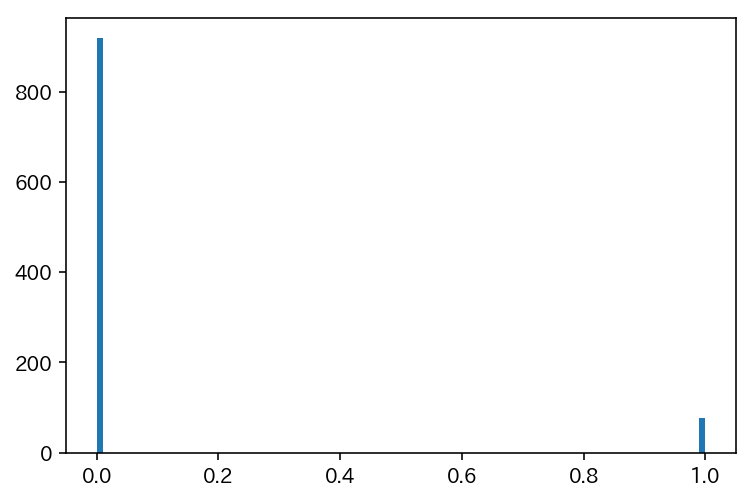

In [111]:
plt.hist(y_valid_pred_prob, bins=100)
plt.show()

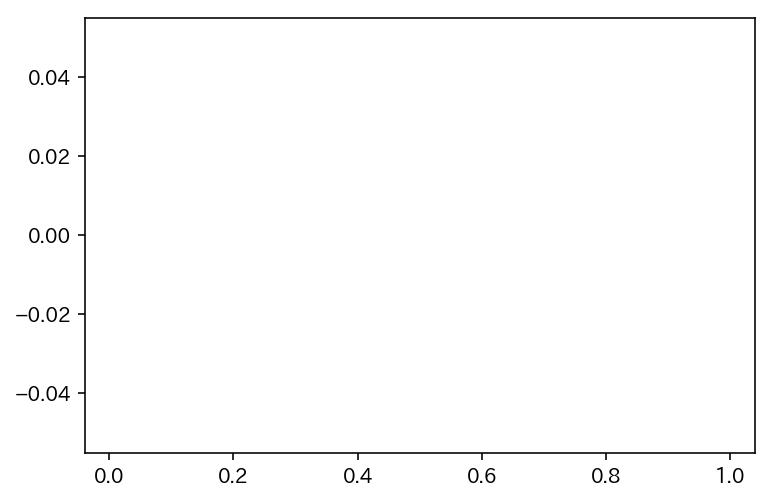

In [112]:
plt.hist(y_valid_pred_prob, bins=100, range=(0.01, 0.99))
plt.show()

In [37]:
def evaluation(y_valid_pred_prob, threshold):
    print("-"*30)
    print("threshold : " + str(threshold))
    print('acc : ' + str(accuracy_score(y_valid==0, (y_valid_pred_prob)<threshold)))
    print('recall : ' + str(recall_score(y_valid==0, (y_valid_pred_prob)<threshold)))
    print('precision : ' + str(precision_score(y_valid==0, (y_valid_pred_prob)<threshold)))
    print('f1 : ' + str(f1_score(y_valid==0, (y_valid_pred_prob)<threshold)))
    cm = confusion_matrix(y_valid==0, (y_valid_pred_prob)<threshold)
    print(cm)
    return f1_score(y_valid==0, (y_valid_pred_prob)<threshold)

In [113]:
f1_best = 0.0
threshold_best = 0.0
for threshold in range(0, 20):
    f1 = evaluation(y_valid_pred_prob, threshold/100)
    if f1 > f1_best:
        f1_best = f1
        threshold_best = threshold/100
print("\n"+"*"*30)
print("best threshold : " + str(threshold_best))
print("best f1_score : " + str(f1_best))
print("*"*30)

------------------------------
threshold : 0.0
acc : 0.07645875251509054
recall : 0.0
precision : 0.0
f1 : 0.0
[[ 76   0]
 [918   0]]
------------------------------
threshold : 0.01
acc : 1.0
recall : 1.0
precision : 1.0
f1 : 1.0
[[ 76   0]
 [  0 918]]
------------------------------
threshold : 0.02
acc : 1.0
recall : 1.0
precision : 1.0
f1 : 1.0
[[ 76   0]
 [  0 918]]
------------------------------
threshold : 0.03
acc : 1.0
recall : 1.0
precision : 1.0
f1 : 1.0
[[ 76   0]
 [  0 918]]
------------------------------
threshold : 0.04
acc : 1.0
recall : 1.0
precision : 1.0
f1 : 1.0
[[ 76   0]
 [  0 918]]
------------------------------
threshold : 0.05
acc : 1.0
recall : 1.0
precision : 1.0
f1 : 1.0
[[ 76   0]
 [  0 918]]
------------------------------
threshold : 0.06
acc : 1.0
recall : 1.0
precision : 1.0
f1 : 1.0
[[ 76   0]
 [  0 918]]
------------------------------
threshold : 0.07
acc : 1.0
recall : 1.0
precision : 1.0
f1 : 1.0
[[ 76   0]
 [  0 918]]
------------------------------
th

In [89]:
importance = model.feature_importance(importance_type='gain')
importance = pd.DataFrame(importance, index=col_name, columns=['importance']).sort_values('importance', ascending=False)
importance = importance.iloc[0:100, :]

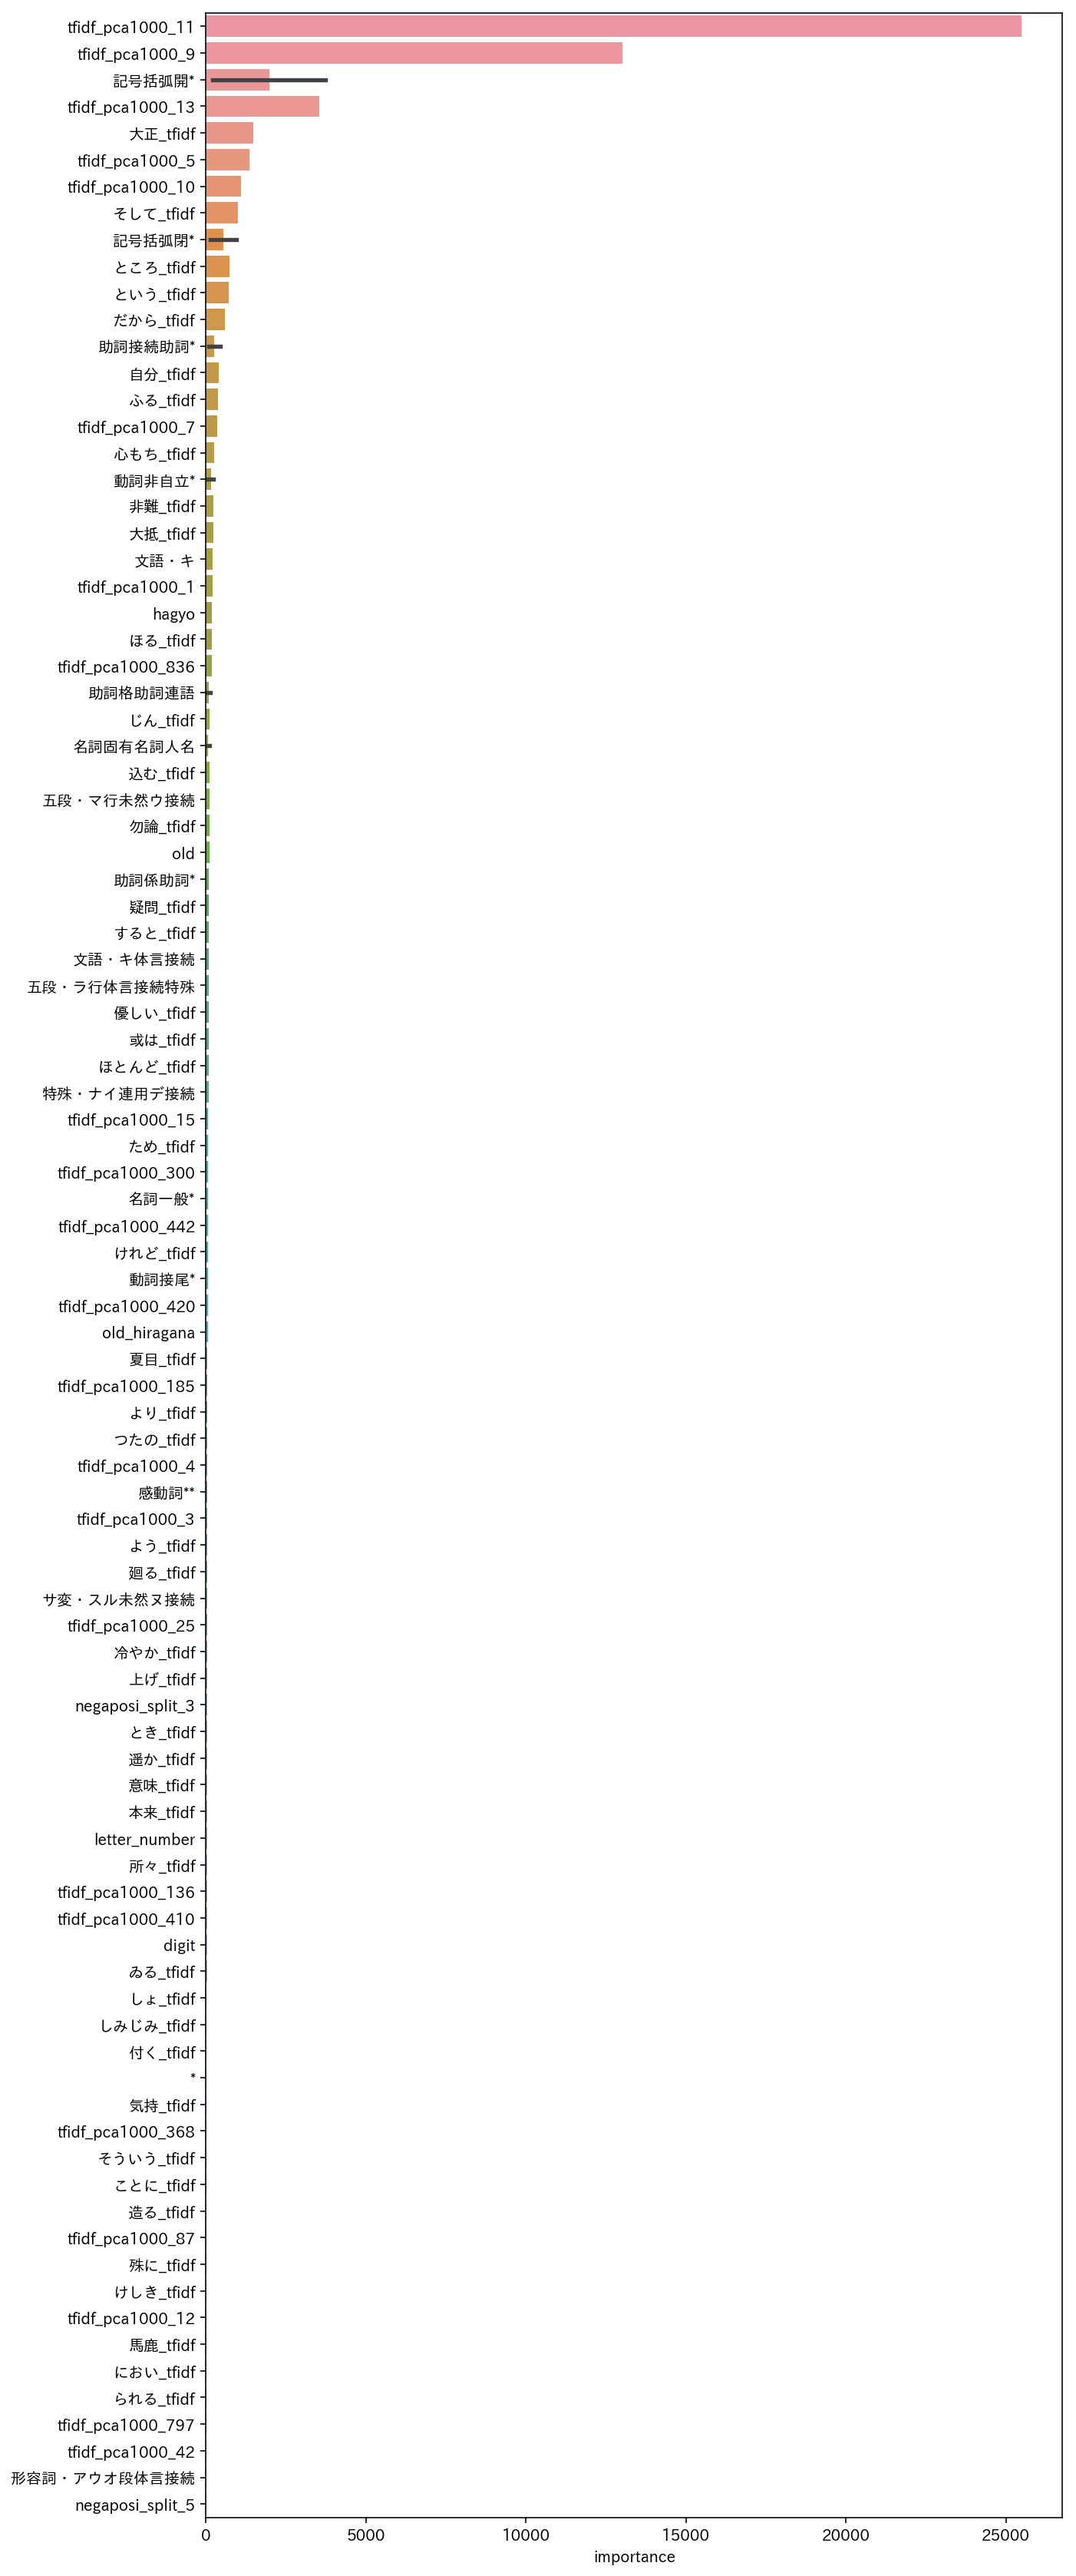

In [90]:
plt.figure(figsize=(10, 30))
sns.barplot(x = importance['importance'], y = importance.index)
plt.show()

In [91]:
importance = model.feature_importance(importance_type='split')
importance = pd.DataFrame(importance, index=col_name, columns=['importance']).sort_values('importance', ascending=False)
importance = importance.iloc[0:100, :]

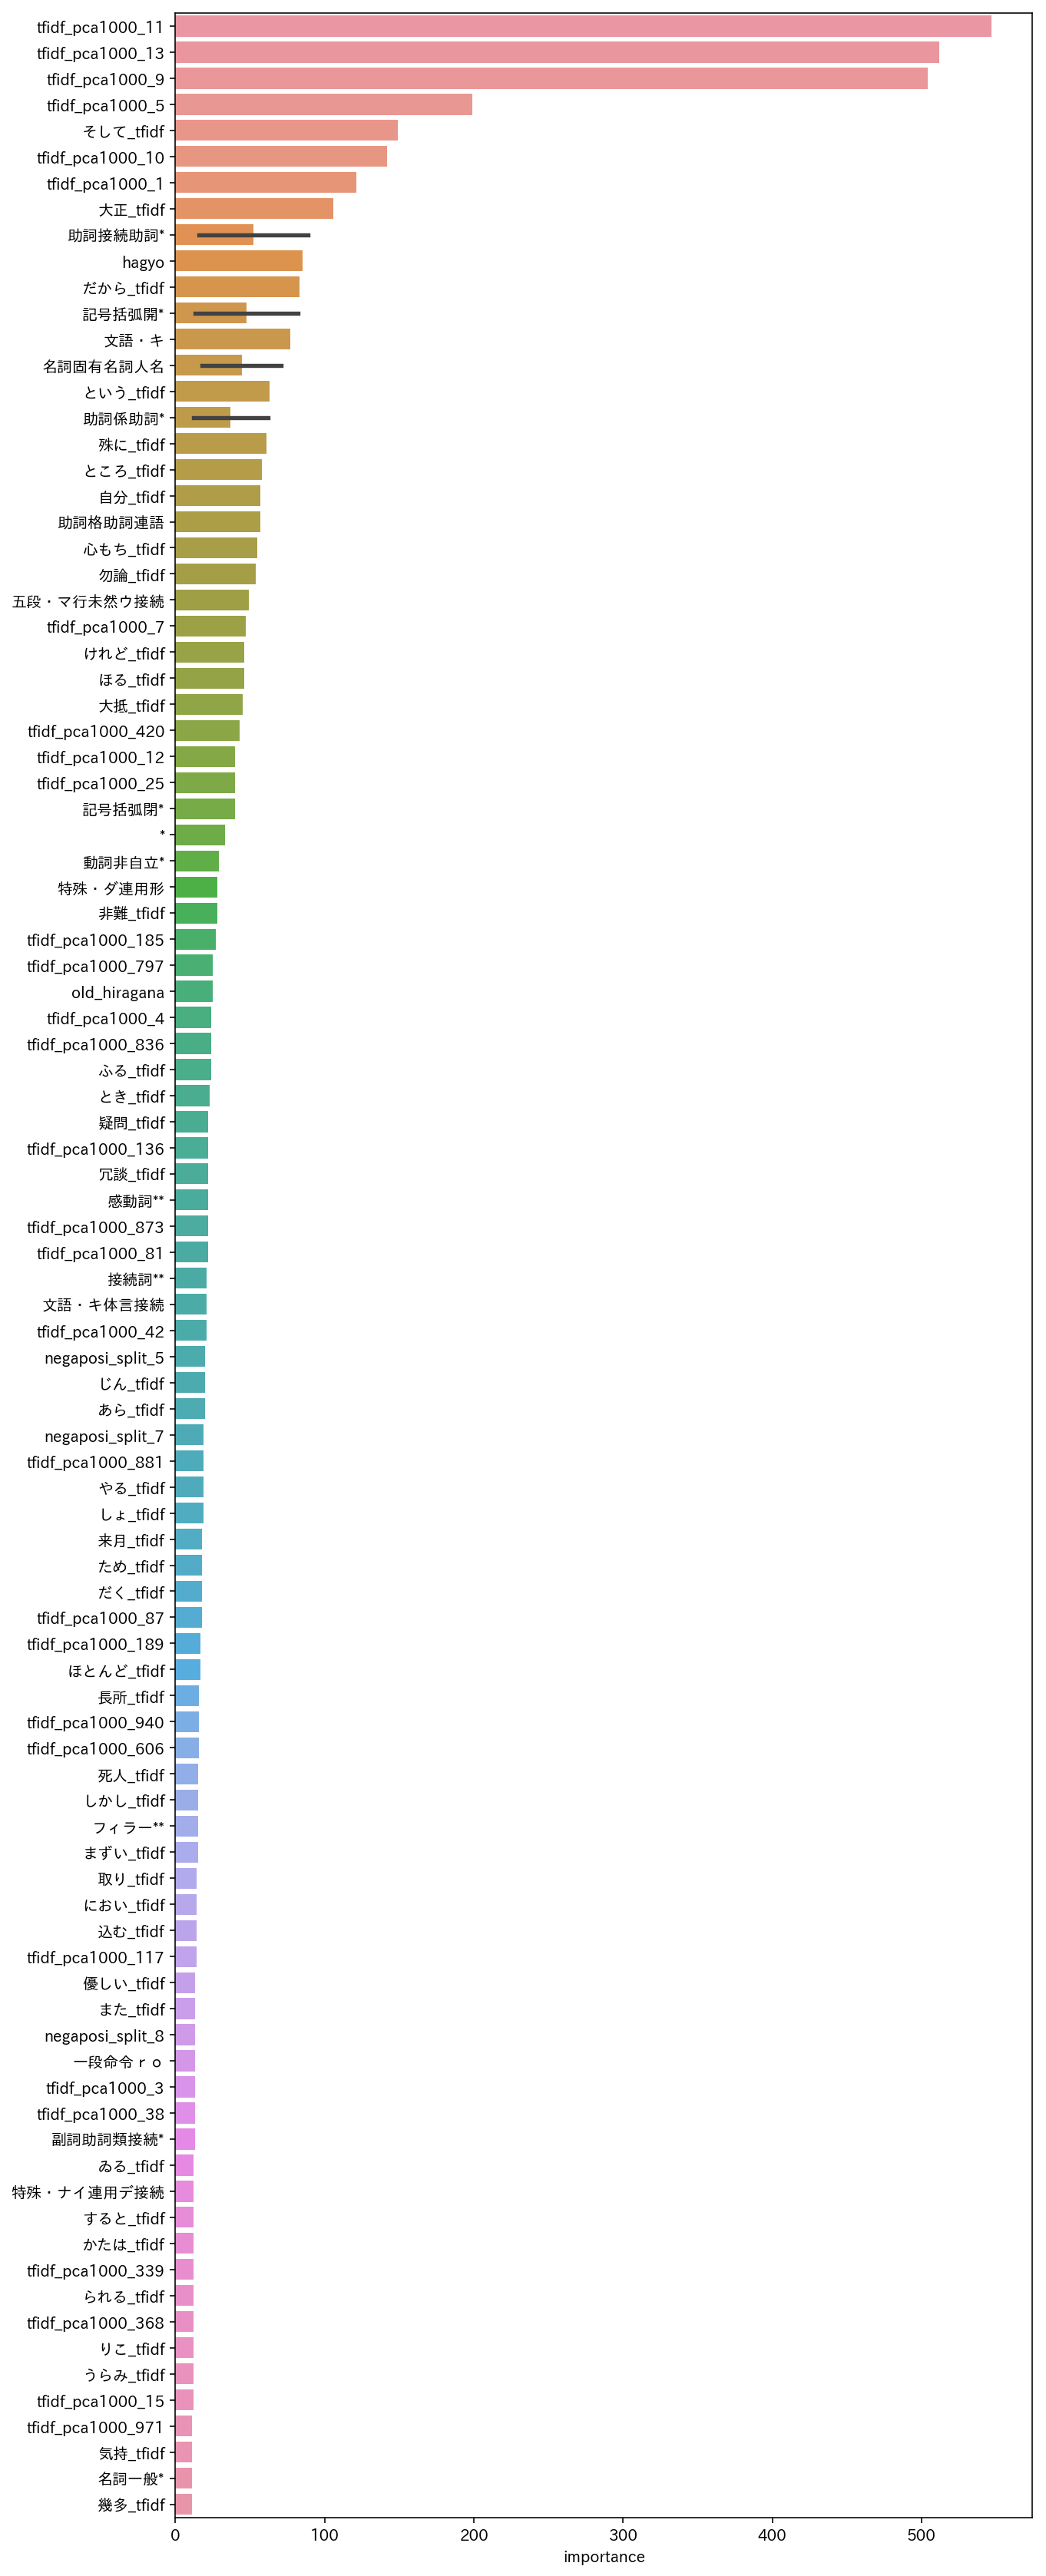

In [92]:
plt.figure(figsize=(10, 30))
sns.barplot(x = importance['importance'], y = importance.index)
plt.show()

In [114]:
y_test = grid_search.predict_proba(X_test)[:, 1]
# y_test = model.predict(X_test)

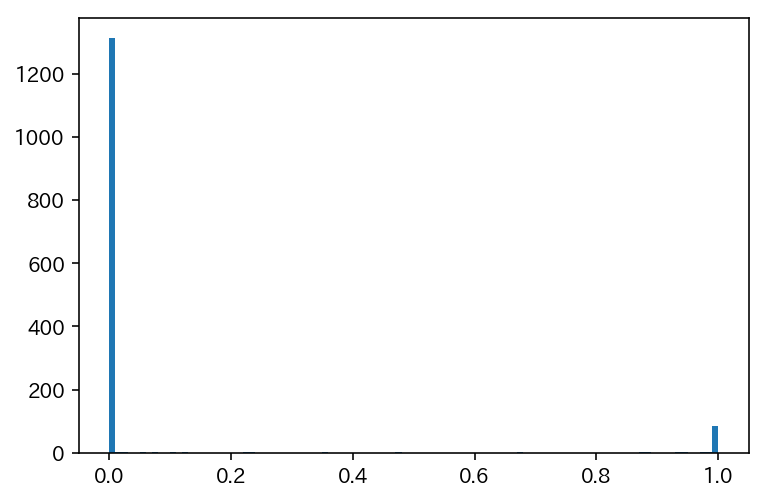

In [115]:
plt.hist(y_test, bins=100)
plt.show()

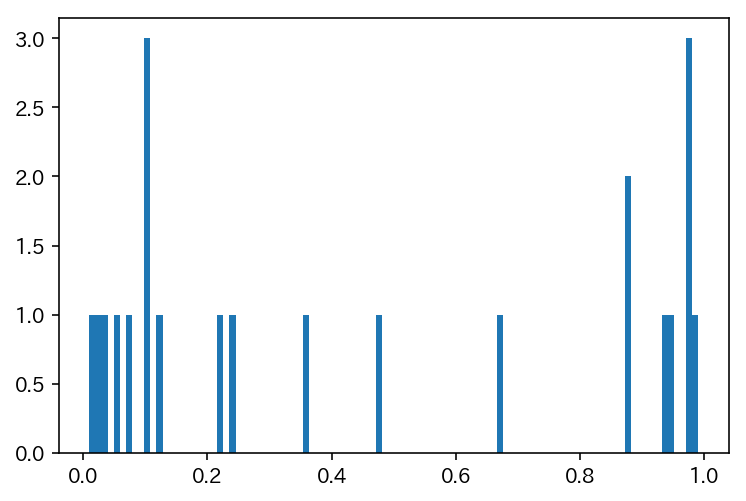

In [116]:
plt.hist(y_test, bins=100, range=(0.01, 0.99))
plt.show()

In [117]:
print("threshold_best : " + str(threshold_best))
print("akutagawa : " + str(sum((y_test > threshold_best)*1)))
print("not akutagawa : " + str(sum((y_test <= threshold_best)*1)))

threshold_best : 0.01
akutagawa : 107
not akutagawa : 1313


In [130]:
submit_sample = pd.read_csv("../input/sample_submission.csv", index_col=0)

In [138]:
train_akutagawa_rate = y_train["target"].value_counts()[0]/(y_train["target"].value_counts()[0]+y_train["target"].value_counts()[1])
test_akutagawa_rate = submit_sample["author"].value_counts()[0]/(submit_sample["author"].value_counts()[0]+submit_sample["author"].value_counts()[1])

In [143]:
# submit_sample["author"] = (y_test > threshold_best)*1
submit_sample["author"] = (y_test > (1.0 - train_akutagawa_rate))*1

train_akutagawa_rate = y_train["target"].value_counts()[0]/(y_train["target"].value_counts()[0]+y_train["target"].value_counts()[1])
test_akutagawa_rate = submit_sample["author"].value_counts()[0]/(submit_sample["author"].value_counts()[0]+submit_sample["author"].value_counts()[1])
print(train_akutagawa_rate)
print(test_akutagawa_rate)
submit_sample

0.9240724762726489
0.9274647887323944


,author
writing_id,
4,0
5,0
6,0
10,0
11,0
13,0
18,0
21,0
26,0


In [146]:
submit_sample.to_csv("../output/submission_0126_2.csv")